In [1]:
#!pip install openpyxl
import pandas as pd
people=pd.read_excel("People.xlsx")
contribution=pd.read_excel('Contribution.xlsx')
names=pd.read_excel('Formatted Names.xlsx')

c:\Users\epmack\AppData\Local\anaconda3\envs\RandPiforcoursera\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


# Part1 Create Email List

In [2]:
people.columns

Index(['Primary ID', 'First Name', 'Last Name',
       'Primary Constituent Affiliation', 'Person Status', 'Preferred Email',
       'Preferred Phone', 'City', 'State', 'Zip', 'No Email Indicator',
       'No Mail Indicator', 'No Phone Indicator', 'No Solicitation Indicator'],
      dtype='object')

In [3]:
#keep only needed columns
people1=people[['Primary ID', 'First Name', 'Last Name',
        'Person Status', #will filter on person status =='Current'
        'Preferred Email',
        'No Email Indicator', #will filter on !='Yes'
        ]]

people1=people1[people1['No Email Indicator']!='Yes']
print(people1.shape)
people1.head()

(16733, 6)


,Primary ID,First Name,Last Name,Person Status,Preferred Email,No Email Indicator
0,A12850,Zander,Kirby,Current,email3828@uidaho.edu,No
1,A17915,Kamila,Mccann,Current,email1944@uidaho.edu,No
2,A25384,Jerimiah,Mclean,Current,email10323@uidaho.edu,No
3,A20281,Joel,Heath,Current,NaN,No
4,A10608,Brianna,Odonnell,Current,email3585@uidaho.edu,No


In [7]:
#filter for only living (current) donors
people1=people1[people1['Person Status']=='Current']
print(people1['Person Status'].value_counts())



Person Status
Current    16136
Name: count, dtype: int64


In [8]:
# we can drop the column we just filtered
people1=people1.drop(columns=['Person Status'])
#filter out do not contact by email (yes)
people1=people1[people1['No Email Indicator']!='Yes']
people1['No Email Indicator'].value_counts()

No Email Indicator
No    16136
Name: count, dtype: int64

In [86]:
# check stats
people1.describe(include='all')

,Primary ID,First Name,Last Name,Preferred Email,No Email Indicator
count,16136,16136,16136,10648,16136
unique,16136,1461,2285,10171,1
top,A12850,Zachary,Weeks,email6183@uidaho.edu,No
freq,1,316,145,4,16136


In [9]:
# note there are less emails than people
people1['Preferred Email'].isnull().sum()


5488

In [10]:
#drop rows with no email and recheck
people1=people1.dropna(axis=0)
people1.describe(include='all')


,Primary ID,First Name,Last Name,Preferred Email,No Email Indicator
count,10648,10648,10648,10648,10648
unique,10648,1296,2149,10171,1
top,A12850,Zachary,Weeks,email6183@uidaho.edu,No
freq,1,232,95,4,10648


In [11]:
#inspect next dataframe
names.describe(include='all')

,HouseholdID,PrimaryID,SpouseID,Type,Name Value,Spouse/Partner First Name,Spouse/Partner Last Name
count,9637,9637,9065,9637,4532,9065,9065
unique,5104,9636,9065,1,4119,1153,1708
top,A14404,A17293,A13754,Casual Joint Salutation,Ronin and Keyon,Zachary,Weeks
freq,2,2,1,9637,7,200,82


In [12]:
#rename Primary ID in people to match names data frame for merging later
people1=people1.rename(columns={'Primary ID':'PrimaryID'})
#check
people1.columns

Index(['PrimaryID', 'First Name', 'Last Name', 'Preferred Email',
       'No Email Indicator'],
      dtype='object')

In [13]:
#we conclude from above stats there is a dup value in 'PrimaryID' 
#inspect
names[(names['PrimaryID']=='A17293')] #will drop dup row

,HouseholdID,PrimaryID,SpouseID,Type,Name Value,Spouse/Partner First Name,Spouse/Partner Last Name
5115,A10971,A17293,NaN,Casual Joint Salutation,NaN,NaN,NaN
5116,A10971,A17293,NaN,Casual Joint Salutation,NaN,NaN,NaN


In [14]:

#Dup Primary ID is an error. Drop and check
names1=names.drop_duplicates()
names1.describe(include='all')

,HouseholdID,PrimaryID,SpouseID,Type,Name Value,Spouse/Partner First Name,Spouse/Partner Last Name
count,9636,9636,9065,9636,4532,9065,9065
unique,5104,9636,9065,1,4119,1153,1708
top,A14404,A14404,A13754,Casual Joint Salutation,Ronin and Keyon,Zachary,Weeks
freq,2,1,1,9636,7,200,82


In [15]:
#drop dup entries for partners. Noted householdID always matches one spouse
names2=names1.drop_duplicates(subset=['HouseholdID'])# program drops row with less data
#check
names2.describe(include='all')

,HouseholdID,PrimaryID,SpouseID,Type,Name Value,Spouse/Partner First Name,Spouse/Partner Last Name
count,5104,5104,4533,5104,4532,4533,4533
unique,5104,5104,4533,1,4119,911,1625
top,A14404,A14404,A13754,Casual Joint Salutation,Ronin and Keyon,Adalyn,Weeks
freq,1,1,1,5104,7,91,43


In [16]:
#merge to creat email list
emaillist=pd.merge(names2, people1, on=['PrimaryID'], how='inner', indicator=True)
#check email list for nulls. shoul only have blank where there is no partner
print(emaillist.isnull().sum())
emaillist.describe(include='all')

HouseholdID                    0
PrimaryID                      0
SpouseID                     191
Type                           0
Name Value                   191
Spouse/Partner First Name    191
Spouse/Partner Last Name     191
First Name                     0
Last Name                      0
Preferred Email                0
No Email Indicator             0
_merge                         0
dtype: int64


,HouseholdID,PrimaryID,SpouseID,Type,Name Value,Spouse/Partner First Name,Spouse/Partner Last Name,First Name,Last Name,Preferred Email,No Email Indicator,_merge
count,3351,3351,3160,3351,3160,3160,3160,3351,3351,3351,3351,3351
unique,3351,3351,3160,1,2936,786,1383,682,1429,3348,1,1
top,A14404,A14404,A13754,Casual Joint Salutation,Zachary and Daphne,Adalyn,Weeks,Zachary,Weeks,email10333@uidaho.edu,No,both
freq,1,1,1,3351,6,63,29,135,27,2,3351,3351


In [18]:
emaillist.columns

Index(['HouseholdID', 'PrimaryID', 'SpouseID', 'Type', 'Name Value',
       'Spouse/Partner First Name', 'Spouse/Partner Last Name', 'First Name',
       'Last Name', 'Preferred Email', 'No Email Indicator', '_merge'],
      dtype='object')

In [19]:
#rename 'Casual Joint Salutation' column
emaillist1=emaillist.rename(columns={'Name Value':'Casual Joint Salutation'})
#emaillist1=emaillist1.drop(columns=['Type'])
#reorder to output conditions omiting anything we don't need.
emaillist2=emaillist1[['HouseholdID', 'PrimaryID', 'SpouseID','First Name','Last Name','Spouse/Partner First Name', 'Spouse/Partner Last Name','Casual Joint Salutation','Preferred Email', 'No Email Indicator']]
#creat excel file and do one last check
emaillist2.to_excel('emaillist.xlsx')
emaillist2.head()

,HouseholdID,PrimaryID,SpouseID,First Name,Last Name,Spouse/Partner First Name,Spouse/Partner Last Name,Casual Joint Salutation,Preferred Email,No Email Indicator
0,A14404,A14404,A13754,Abagail,Santana,Keyla,Santana,Abagail and Keyla,email10573@uidaho.edu,No
1,A10258,A10258,A27840,Abbey,Davies,Beatrice,Cox,Abbey and Beatrice,email7299@uidaho.edu,No
2,A18900,A18900,A24500,Abbey,Pace,Matthew,Pace,Abbey and Matthew,email7301@uidaho.edu,No
3,A24346,A24346,A26007,Abbigail,Jaiden,Brooks,Jaiden,Abbigail and Brooks,email4222@uidaho.edu,No
4,A19863,A19863,A28036,Abdullah,Pena,Abby,Serrano,Abdullah and Abby,email3257@uidaho.edu,No


# start of part2 and part 1b

In [113]:
#preview data
contribution.head()


,Primary ID,Association Type,Created On,Amount,College,Department (Designation) (UI_Designation),Recognition Credit,Designation Code,Designation Purpose
0,A12425,Group,2018-07-16 16:22:07,0.0,Letters Arts & Social Sciences,Anthropology Lab,100.0,DE036,Faculty-Staff Support
1,A12426,Contact Person,2018-07-16 16:22:07,0.0,Letters Arts & Social Sciences,Anthropology Lab,0.0,DE036,Faculty-Staff Support
2,A22694,Primary,2018-07-16 16:30:50,20.0,Letters Arts & Social Sciences,Anthropology Lab,20.0,DE036,Faculty-Staff Support
3,A14206,Joint,2018-07-16 16:30:50,0.0,Letters Arts & Social Sciences,Anthropology Lab,20.0,DE036,Faculty-Staff Support
4,A21104,In Memory of,2018-07-16 16:30:51,0.0,Letters Arts & Social Sciences,Anthropology Lab,0.0,DE036,Faculty-Staff Support


In [119]:
contribution.describe(include='all')

,Primary ID,Association Type,Created On,Amount,College,Department (Designation) (UI_Designation),Recognition Credit,Designation Code,Designation Purpose
count,86881,86881,86881,8.688100e+04,86881,86880,8.688100e+04,86881,86881
unique,18164,10,NaN,NaN,8,71,NaN,1417,4
top,A19577,Primary,NaN,NaN,Athletics,General Athletic Support,NaN,NF681,Students
freq,591,46660,NaN,NaN,25914,23188,NaN,13886,45456
mean,NaN,NaN,2020-06-30 09:20:38.704665088,1.106506e+03,NaN,NaN,1.853725e+03,NaN,NaN
min,NaN,NaN,2018-07-12 21:08:42,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,2019-04-26 16:33:41,0.000000e+00,NaN,NaN,2.100000e+01,NaN,NaN
50%,NaN,NaN,2020-04-23 15:56:06,1.000000e+01,NaN,NaN,8.000000e+01,NaN,NaN
75%,NaN,NaN,2021-07-12 12:28:27,1.000000e+02,NaN,NaN,2.500000e+02,NaN,NaN
max,NaN,NaN,2022-11-30 15:50:29,5.300000e+06,NaN,NaN,5.300000e+06,NaN,NaN


## Create merged file for exploritory market sementation in Power BI

In [20]:
#for part 2 market segmentation
donors=pd.merge(contribution, people, on=['Primary ID'], how='outer', indicator=True)
names3=names2.rename(columns={'PrimaryID':'Primary ID'})
alldf=pd.merge(donors, names3, on=['Primary ID'], how='outer',)
alldf=alldf.sort_values(by=['Amount','State','College','Department (Designation) (UI_Designation)',],ascending=False)
alldf.to_excel('part2BI.xlsx', index=False)
#will inspect excel file make changes as needed and then rename part2BIclean.xlsx before importing into power BI
#donors.describe(include='all')
alldf.head(10)

,Primary ID,Association Type,Created On,Amount,College,Department (Designation) (UI_Designation),Recognition Credit,Designation Code,Designation Purpose,First Name,...,No Mail Indicator,No Phone Indicator,No Solicitation Indicator,_merge,HouseholdID,SpouseID,Type,Name Value,Spouse/Partner First Name,Spouse/Partner Last Name
59525,A22070,Primary,2020-06-16 16:56:37,5300000.0,Agricultural & Life Sciences,Agricultural & Life Sciences,5300000.0,MF015,Programs,Norah,...,No,No,No,both,NaN,NaN,NaN,NaN,NaN,NaN
63826,A22996,Primary,2022-08-05 15:03:03,2375000.0,Natural Resources,Natural Resources & Society,2375000.0,DE997,Students,Jabari,...,No,Yes,Yes,both,NaN,NaN,NaN,NaN,NaN,NaN
57926,A21654,Primary,2021-06-25 12:41:43,2000000.0,Business & Economics,Accounting & Mgmt Info Systems,2000000.0,MF003,Students,Brianna,...,No,No,Yes,both,NaN,NaN,NaN,NaN,NaN,NaN
57929,A21654,Primary,2022-01-04 14:01:26,2000000.0,Business & Economics,Accounting & Mgmt Info Systems,2000000.0,DE694,Students,Brianna,...,No,No,Yes,both,NaN,NaN,NaN,NaN,NaN,NaN
9102,A12625,Primary,2019-05-21 09:57:02,1555360.0,Agricultural & Life Sciences,Agricultural & Life Sciences,1555360.0,EE663,Students,Nigel,...,No,No,No,both,NaN,NaN,NaN,NaN,NaN,NaN
9103,A12625,Primary,2019-05-23 10:13:58,1555360.0,Agricultural & Life Sciences,Agricultural & Life Sciences,1555360.0,EE663,Students,Nigel,...,No,No,No,both,NaN,NaN,NaN,NaN,NaN,NaN
83566,A27477,Primary,2018-11-06 16:24:15,1400000.0,Agricultural & Life Sciences,Agricultural & Life Sciences,1400000.0,VI324,Programs,Jacqueline,...,No,No,Yes,both,A27477,A14510,Casual Joint Salutation,Jacqueline and Megan,Megan,Cooley
83569,A27477,Primary,2018-11-15 09:17:16,1400000.0,Agricultural & Life Sciences,Agricultural & Life Sciences,1400000.0,VI324,Programs,Jacqueline,...,No,No,Yes,both,A27477,A14510,Casual Joint Salutation,Jacqueline and Megan,Megan,Cooley
83574,A27477,Primary,2019-08-09 14:26:22,1400000.0,Agricultural & Life Sciences,Agricultural & Life Sciences,1400000.0,NF413,Programs,Jacqueline,...,No,No,Yes,both,A27477,A14510,Casual Joint Salutation,Jacqueline and Megan,Megan,Cooley
83575,A27477,Primary,2019-12-05 12:12:42,1400000.0,Agricultural & Life Sciences,Agricultural & Life Sciences,1400000.0,NF413,Programs,Jacqueline,...,No,No,Yes,both,A27477,A14510,Casual Joint Salutation,Jacqueline and Megan,Megan,Cooley


In [21]:
#groupby on donors unque id to sum donations by donor and count Number of donations
totbyDonoralldf=alldf.groupby(['Primary ID','First Name','Last Name','State',"College",'Primary Constituent Affiliation','Type'], as_index=False).agg({'Amount':'sum', 'Recognition Credit': 'sum',"Created On":'count'})
#major donors sorted my total amount donated
totbyDonoralldf.sort_values(by='Amount', ascending=False).head(20)

,Primary ID,First Name,Last Name,State,College,Primary Constituent Affiliation,Type,Amount,Recognition Credit,Created On
5930,A27477,Jacqueline,Cooley,ID,Agricultural & Life Sciences,Friend,Casual Joint Salutation,5937000.00,6547000.00,11
3696,A20996,Mary,Colt,ID,Agricultural & Life Sciences,Friend,Casual Joint Salutation,0.00,5300000.00,1
4895,A24661,Nathanial,Santana,ID,Business & Economics,Alumna/us,Casual Joint Salutation,2340000.00,2365000.00,9
2615,A17919,Niko,Ramsey,WA,Athletics,Friend,Casual Joint Salutation,0.00,2050000.00,9
2557,A17792,Damon,Park,ID,Agricultural & Life Sciences,Faculty/Staff,Casual Joint Salutation,2368180.00,1777010.00,8
5687,A26801,Allan,Hodge,ID,Engineering,Alumna/us,Casual Joint Salutation,1550589.54,1550589.54,40
4389,A23105,Sullivan,Park,ID,Agricultural & Life Sciences,Alumna/us,Casual Joint Salutation,1109000.00,1112000.00,5
4132,A22404,Haylie,Hamilton,ID,Engineering,Alumna/us,Casual Joint Salutation,1032623.23,1053623.23,10
4304,A22837,Rowan,Kaitlyn,NH,Agricultural & Life Sciences,Alumna/us,Casual Joint Salutation,1026507.01,1026507.01,6
4686,A24007,Joel,Vaughn,ID,Letters Arts & Social Sciences,Alumna/us,Casual Joint Salutation,1016922.72,1016922.72,6


In [24]:
#loyal donors
totbyDonoralldf.sort_values(by='Created On', ascending=False).head(20)

,Primary ID,First Name,Last Name,State,College,Primary Constituent Affiliation,Type,Amount,Recognition Credit,Created On
1151,A13737,Grace,Pace,ID,Engineering,Alumna/us,Casual Joint Salutation,10.00,11545.00,316
3255,A19695,Stephen,Montoya,ID,Agricultural & Life Sciences,Faculty/Staff,Casual Joint Salutation,0.00,1205.00,231
961,A13173,Lauren,Kent,ID,"Education, Health & Human Sci",Alumna/us,Casual Joint Salutation,1770.00,1770.00,231
926,A13079,Melina,Gutierrez,ID,Agricultural & Life Sciences,Faculty/Staff,Casual Joint Salutation,20457.20,20457.20,192
3155,A19475,Zachary,Bright,ID,Letters Arts & Social Sciences,Alumna/us,Casual Joint Salutation,0.00,880.00,170
2999,A18999,Yasmine,Brewer,ID,Agricultural & Life Sciences,Faculty/Staff,Casual Joint Salutation,2345.00,3843.00,132
1633,A15146,Zion,Addison,ID,Art & Architecture,Faculty/Staff,Casual Joint Salutation,48938.78,48938.78,130
2709,A18155,Keyon,Lara,ID,Engineering,Alumna/us,Casual Joint Salutation,0.00,5665.06,125
4687,A24010,Zion,Stephanie,ID,Athletics,Alumna/us,Casual Joint Salutation,0.00,1134.11,119
3349,A19947,Yasmine,Alexander,ID,Athletics,Alumna/us,Casual Joint Salutation,786.67,4768.15,118


# For Part1b: Top 10 living NW donors in engineering

In [25]:
#filter by state
NWdonors=donors[donors['State'].isin(['WA','ID','OR'])]
#Filter out designation code NF681
NWdonors=NWdonors[NWdonors['Designation Code']!='NF681']
#filter out key phases

#Search string
key_phrases = ['In Memory of', 'In Honor of']
mask=NWdonors['Association Type'].str.contains('|'.join(key_phrases), case=False, na=False)
# negate mask
NWdonors1=NWdonors[~mask]


In [26]:
#create year column for graphs
year=NWdonors1['Created On'].dt.year
NWdonors1['Year']=year

NWdonors1.describe(include='all')
#create option for making graph in power BI
NWdonors1.to_excel('part1bdata.xlsx')

C:\Users\epmack\AppData\Local\Temp\ipykernel_30008\2650868560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NWdonors1['Year']=year


In [27]:
#import vis tools

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
%matplotlib inline

## create part1b graph

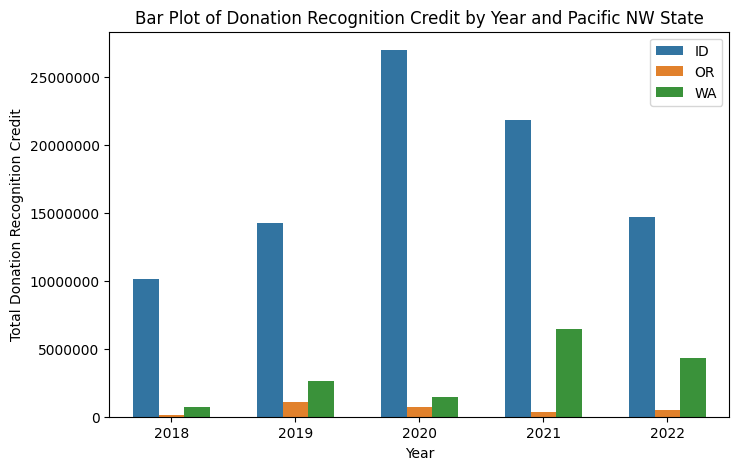

In [29]:
#set some options of y-values in the graph
y_option=['Amount','Recognition Credit','Created On']


NWdonorbyStateandYear=NWdonors1.groupby(['Year','State'], as_index=False).agg({'Amount':'sum', 'Recognition Credit': 'sum',"Created On":'count'})


fig=plt.figure(figsize=(8,5))
sns.barplot(data=NWdonorbyStateandYear, x='Year', y=y_option[1], hue='State', width=.618, errorbar=None)
    #supress 95% confident interval errorbar because this census data not a sample nor predictive stats.

# Show the plot
plt.title(f'Bar Plot of Donation {y_option[1]} by Year and Pacific NW State')
#Use plain number format not Scientific
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xlabel("Year")
plt.ylabel(f'Total Donation {y_option[1]}')
plt.legend()
plt.show()

idaho donations are bigger(see below) but are more importantly more frequent

### create extra graphs

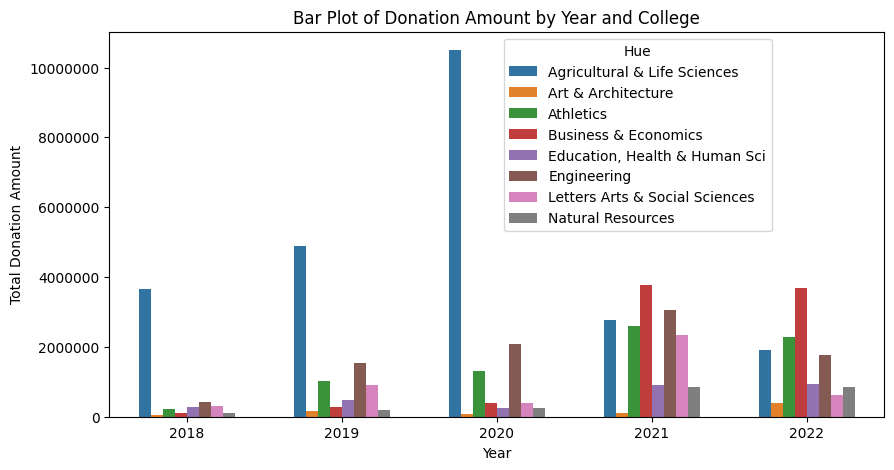

In [30]:
#set some options of y-values in the graph
y_option=['Amount','Recognition Credit']


NWdonorbyStateandCollege=NWdonors1.groupby(['Year', 'College'], as_index=False).agg({'Amount':'sum', 'Recognition Credit': 'sum',"Created On":'count' })
fig=plt.figure(figsize=(10,5))
ax=sns.barplot(data=NWdonorbyStateandCollege, x='Year', y=y_option[0], hue="College", width=.618, errorbar=None)
    #supress 95% confident interval errorbar because this census data not a sample nor predictive stats.
# Adjust the legend
ax.legend(title='Hue', bbox_to_anchor=(.5, 1), loc='upper left')
# Show the plot
plt.title(f'Bar Plot of Donation {y_option[0]} by Year and College')
#Use plain number format not Scientific
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xlabel("Year")
plt.ylabel(f'Total Donation {y_option[0]}')
#plt.legend()
plt.show()



economy wise we can see hope in boltering the business groth area coming out of the pandemic
was terhe grant that ended or a major donor who died in 2020 becasue of the pandemic
was the 2020 funding covid research related
would current data show ai and cyber sec funding

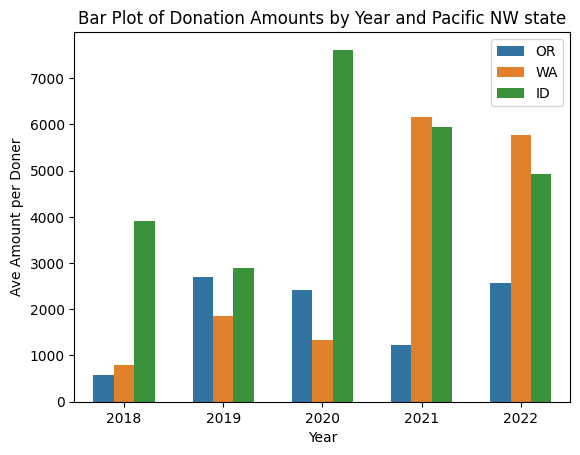

In [32]:
#group by donor ID to get subtotal at teh donor level. include year and state so teh resulting df has all teh info for graphing.
NWdonorbyStateandYear=NWdonors1.groupby(['Primary ID','Year','State'], as_index=False).agg({'Amount':'sum', 'Recognition Credit': 'sum',"Created On":'count' })
sns.barplot(data=NWdonorbyStateandYear, x='Year', y='Recognition Credit', hue='State', width=.618, errorbar=None)

# Show the plot
plt.title(f'Bar Plot of Donation Amounts by Year and Pacific NW state')
plt.xlabel("Year")
plt.ylabel('Ave Amount per Doner')
plt.legend()
plt.show()


Personal notes: gov stimulus in 2020 correlated to increae in donations
casues to invest gate are gov infusion of money 
extra money not being spent on travel
legacy clauses due to deaths of fear of death( not having a legacy)
ODaho is behfar the biggest source but oregon has be up ticking


### Ave Amount per Donation

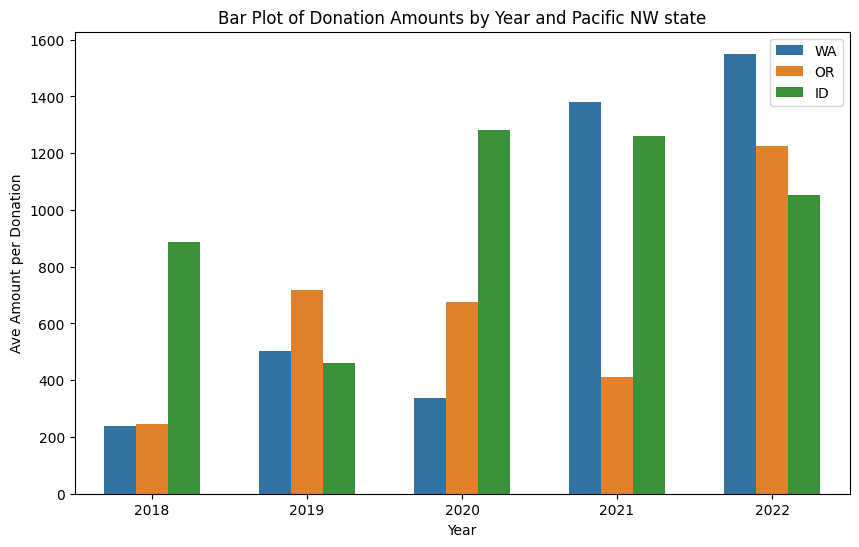

In [165]:
# Create a box plot using Seaborn
fig=plt.figure(figsize=(10,6))
sns.barplot(data=NWdonors1, x='Year', y='Amount', hue='State', width=.618, errorbar=None)

# Show the plot
plt.title(f'Bar Plot of Donation Amounts by Year and Pacific NW state')
plt.xlabel("Year")
plt.ylabel('Ave Amount per Donation')
plt.legend()
plt.show()

Consider the role of politics relative to donations from Oregon
size of donations had trended up

## Create list of top 10 NW current, non-memorial engineering donations

In [33]:
NWdonors1=NWdonors1.sort_values(by=['College','Recognition Credit'], ascending=False)
#filter on engineering
NWengr=NWdonors1[NWdonors1['College']=='Engineering']
#NWengr.head()

In [34]:
# Group by 'donor' and sum the 'recognition credit' column
NWengrbyDoner=NWengr.groupby(['Primary ID','First Name', 'Last Name'], as_index=False).agg({
    'Recognition Credit': 'sum',
    'Created On': 'count'  #count the number of donations
})
NWengrbyDoner=NWengrbyDoner.sort_values(by=['Recognition Credit'], ascending=False)

# Rename columns for clarity
NWengrbyDoner.rename(columns={'Recognition Credit': 'total_recognition credit', 'Created On': 'number_of_donations'}, inplace=True)

output=NWengrbyDoner.head(10)
output.to_excel('top10.xlsx')

In [35]:
#if sending thank you card we want to make it presonal. add partners to the file
names2=names2.rename(columns={'PrimaryID': 'Primary ID'})
includeSpouse=pd.merge(NWengrbyDoner,names2, on='Primary ID', how='inner')
outputwpartner=includeSpouse.head(10)
outputwpartner.to_excel('top10wpartners.xlsx')